In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('edge_flower.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Adding Text

In [6]:
text_img = img.copy()
text_img = cv2.putText(
    text_img,
    'OpenCV Demo',
    (50, 50),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (0, 255, 0),
    2
)

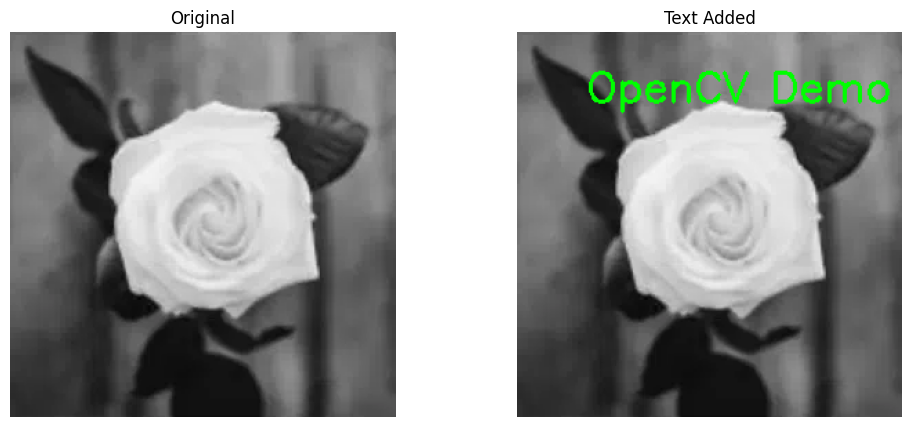

In [7]:
plt.figure(figsize=[12,5])
plt.subplot(121); plt.imshow(img); plt.title('Original'); plt.axis('off')
plt.subplot(122); plt.imshow(text_img); plt.title('Text Added'); plt.axis('off')
plt.show()

## Layering images & transparency

In [17]:
img1 = cv2.imread('coca-cola-logo.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [18]:
img2 = cv2.imread('logo_final.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [24]:
overlay = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

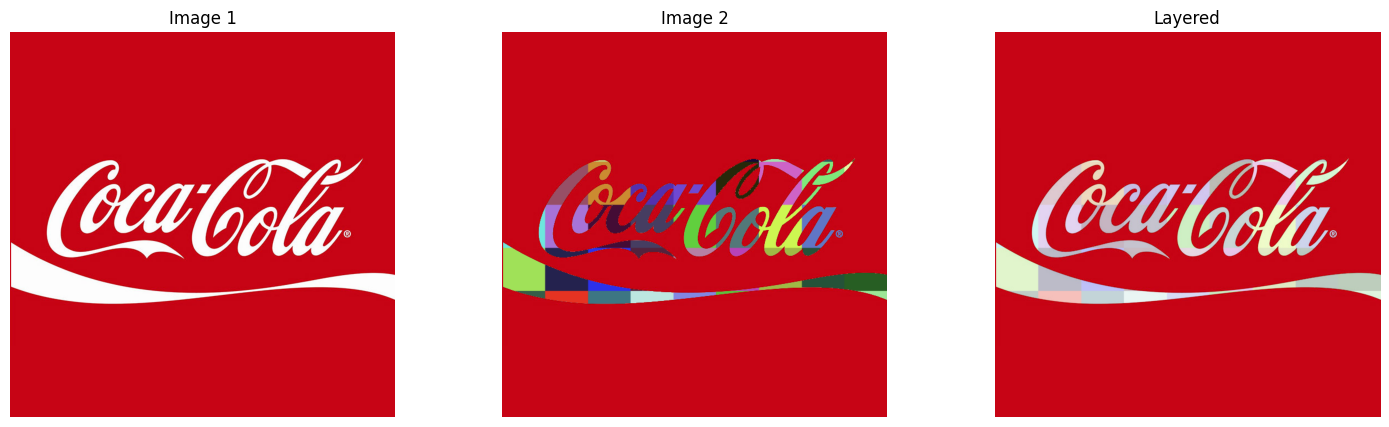

In [25]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img1); plt.title('Image 1'); plt.axis('off')
plt.subplot(132); plt.imshow(img2); plt.title('Image 2'); plt.axis('off')
plt.subplot(133); plt.imshow(overlay); plt.title('Layered'); plt.axis('off')
plt.show()